In [1]:
from vllm import LLM, SamplingParams

In [2]:
prompts = [
    "Hello, my name is",
    "The president of the United States is",
    "The capital of France is",
    "The future of AI is",
]
sampling_params = SamplingParams(temperature=0.8, top_p=0.95)

In [3]:
llm = LLM(model="deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B")

INFO 01-29 12:12:23 config.py:510] This model supports multiple tasks: {'reward', 'classify', 'embed', 'generate', 'score'}. Defaulting to 'generate'.
WARNING 01-29 12:12:23 arg_utils.py:1103] Chunked prefill is enabled by default for models with max_model_len > 32K. Currently, chunked prefill might not work with some features or models. If you encounter any issues, please disable chunked prefill by setting --enable-chunked-prefill=False.
INFO 01-29 12:12:23 config.py:1458] Chunked prefill is enabled with max_num_batched_tokens=2048.
INFO 01-29 12:12:23 llm_engine.py:234] Initializing an LLM engine (v0.6.6.post1) with config: model='deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B', speculative_config=None, tokenizer='deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=131072, download_dir=None, load_format=auto, tensor_paralle

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 01-29 12:12:38 model_runner.py:1099] Loading model weights took 3.3460 GB
INFO 01-29 12:12:38 worker.py:241] Memory profiling takes 0.54 seconds
INFO 01-29 12:12:38 worker.py:241] the current vLLM instance can use total_gpu_memory (23.99GiB) x gpu_memory_utilization (0.90) = 21.59GiB
INFO 01-29 12:12:38 worker.py:241] model weights take 3.35GiB; non_torch_memory takes 0.22GiB; PyTorch activation peak memory takes 1.39GiB; the rest of the memory reserved for KV Cache is 16.63GiB.
INFO 01-29 12:12:38 gpu_executor.py:76] # GPU blocks: 38931, # CPU blocks: 9362
INFO 01-29 12:12:38 gpu_executor.py:80] Maximum concurrency for 131072 tokens per request: 4.75x
INFO 01-29 12:12:39 model_runner.py:1415] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utiliz

Capturing CUDA graph shapes: 100%|██████████████████████████████████████████████████████| 35/35 [00:08<00:00,  4.19it/s]

INFO 01-29 12:12:48 model_runner.py:1535] Graph capturing finished in 8 secs, took 0.21 GiB
INFO 01-29 12:12:48 llm_engine.py:431] init engine (profile, create kv cache, warmup model) took 10.00 seconds


In [4]:
outputs = llm.generate(prompts, sampling_params)

for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

Processed prompts: 100%|███████████| 4/4 [00:00<00:00, 13.77it/s, est. speed input: 89.53 toks/s, output: 220.37 toks/s]

Prompt: 'Hello, my name is', Generated text: ' X and I\'m trying to solve this problem: "Given a positive integer N'
Prompt: 'The president of the United States is', Generated text: ' the one who issues the official government document of the United States. The president is'
Prompt: 'The capital of France is', Generated text: ' Paris.\n\nThe capital of Brazil is Rio de Janeiro.\n\nThe capital of Italy is'
Prompt: 'The future of AI is', Generated text: ' to be discussed in the future. Will the AI continue to grow faster than our'


INFO 01-29 16:07:34 config.py:510] This model supports multiple tasks: {'embed', 'score', 'generate', 'classify', 'reward'}. Defaulting to 'generate'.
INFO 01-29 16:07:34 llm_engine.py:234] Initializing an LLM engine (v0.6.6.post1) with config: model='Qwen/Qwen2.5-Coder-1.5B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-Coder-1.5B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='xgrammar'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_na

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]


INFO 01-29 16:07:38 model_runner.py:1099] Loading model weights took 2.8875 GB
INFO 01-29 16:08:28 worker.py:241] Memory profiling takes 50.56 seconds
INFO 01-29 16:08:28 worker.py:241] the current vLLM instance can use total_gpu_memory (23.99GiB) x gpu_memory_utilization (0.90) = 21.59GiB
INFO 01-29 16:08:28 worker.py:241] model weights take 2.89GiB; non_torch_memory takes 0.21GiB; PyTorch activation peak memory takes 2.02GiB; the rest of the memory reserved for KV Cache is 16.47GiB.
INFO 01-29 16:07:39 gpu_executor.py:76] # GPU blocks: 38547, # CPU blocks: 9362
INFO 01-29 16:07:39 gpu_executor.py:80] Maximum concurrency for 32768 tokens per request: 18.82x
INFO 01-29 16:07:39 model_runner.py:1415] Capturing cudagraphs for decoding. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI. If out-of-memory error occurs during cudagraph capture, consider decreasing `gpu_memory_utili

Capturing CUDA graph shapes: 100%|██████████████████████████████████████████████████████| 35/35 [00:11<00:00,  2.95it/s]

INFO 01-29 16:07:51 model_runner.py:1535] Graph capturing finished in 12 secs, took 0.21 GiB
INFO 01-29 16:07:51 llm_engine.py:431] init engine (profile, create kv cache, warmup model) took 13.26 seconds



=== Performance Metrics ===
Prompt                         Tokens     Time (s)   Memory (MB) GPU Mem (MB) Tokens/s  

Prompt: What is your name?


Processed prompts: 100%|████████████| 1/1 [00:00<00:00,  4.45it/s, est. speed input: 22.36 toks/s, output: 71.55 toks/s]

Generated text:   I'm sorry, I do not have a name.

Why do you need a


                               13         0.23       0.21       4.00         55.57     

Prompt: What is the capital of France?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  8.50it/s, est. speed input: 59.98 toks/s, output: 137.08 toks/s]

Generated text:   The capital of France is Paris. Paris is the largest city in France and is


                               15         0.13       0.04       0.00         112.34    

Prompt: What do you think the future of AI will be?


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  9.09it/s, est. speed input: 100.83 toks/s, output: 146.63 toks/s]

Generated text:   AI, or artificial intelligence, is a technology that has been rapidly advancing in recent


                               14         0.13       0.04       0.00         110.14    

Prompt: What is the tallest mountain in the world?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  8.74it/s, est. speed input: 79.43 toks/s, output: 141.18 toks/s]

Generated text:   The tallest mountain in the world is Mount Everest, located in the Himalayas region


                               14         0.13       0.03       0.00         105.37    

Prompt: What is the meaning of life?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  9.53it/s, est. speed input: 67.32 toks/s, output: 153.85 toks/s]

Generated text:   Is it a quest for understanding, enlightenment, or simply a way to fulfill desires


                               14         0.12       0.03       0.00         113.78    

Prompt: What do you think people will be doing in 100 years?


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  9.00it/s, est. speed input: 136.10 toks/s, output: 145.15 toks/s]

Generated text:   Will they be wearing spacesuits and flying to Mars, or will they be exploring


                               14         0.13       0.06       0.00         106.96    

Prompt: What is the most famous painting in the world?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  9.22it/s, est. speed input: 93.08 toks/s, output: 148.90 toks/s]

Generated text:   The most famous painting in the world is The Mona Lisa by Leonardo da Vinci.


                               15         0.13       0.03       0.00         116.17    

Prompt: Who invented the internet?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  9.34it/s, est. speed input: 47.10 toks/s, output: 150.69 toks/s]

Generated text:   

A) Steve Jobs
B) Mark Zuckerberg
C) Bill Gates



                               9          0.13       0.02       0.00         69.88     

Prompt: What is your favorite hobby?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  8.47it/s, est. speed input: 51.21 toks/s, output: 136.54 toks/s]

Generated text:   What makes it so special to you?
As an AI language model, I don


                               14         0.14       0.03       0.00         99.51     

Prompt: What does it take to become a successful entrepreneur?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  8.64it/s, est. speed input: 87.22 toks/s, output: 139.54 toks/s]

Generated text:   To become a successful entrepreneur, one needs to have a clear vision for what they


                               15         0.14       0.03       0.00         108.44    

Prompt: Who was the first man on the moon?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  9.11it/s, est. speed input: 82.72 toks/s, output: 147.02 toks/s]

Generated text:   The first man on the moon was Neil Armstrong, who stepped out of the Apollo


                               15         0.13       0.03       0.00         113.77    

Prompt: What does a healthy diet consist of?


Processed prompts: 100%|███████████| 1/1 [00:00<00:00,  9.12it/s, est. speed input: 73.62 toks/s, output: 147.23 toks/s]

Generated text:   A. Main food, mainly grains and vegetables B. Main food, mainly fruits


                               12         0.13       0.02       0.00         90.96     

Prompt: If you could travel anywhere, where would you go?


Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  9.39it/s, est. speed input: 104.55 toks/s, output: 152.04 toks/s]

Generated text:   As an AI language model, I do not have personal preferences or desires, but


                               14         0.13       0.03       0.00         109.19    


/tmp/ipykernel_2831/3204084435.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")



=== Overall Metrics ===
Total Tokens: 178
Total Time: 1.81 seconds
Average Tokens/s: 98.27
CPU Usage: 0.00%
Memory Usage: 5759.47 MB
GPU Utilization: 50.00%


/tmp/ipykernel_2831/3204084435.py:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")
/tmp/ipykernel_2831/3204084435.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
/tmp/ipykernel_2831/3204084435.py:124: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(prompts_list, rotation=30, ha="right")
/tmp/ipykernel_2831/3204084435.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

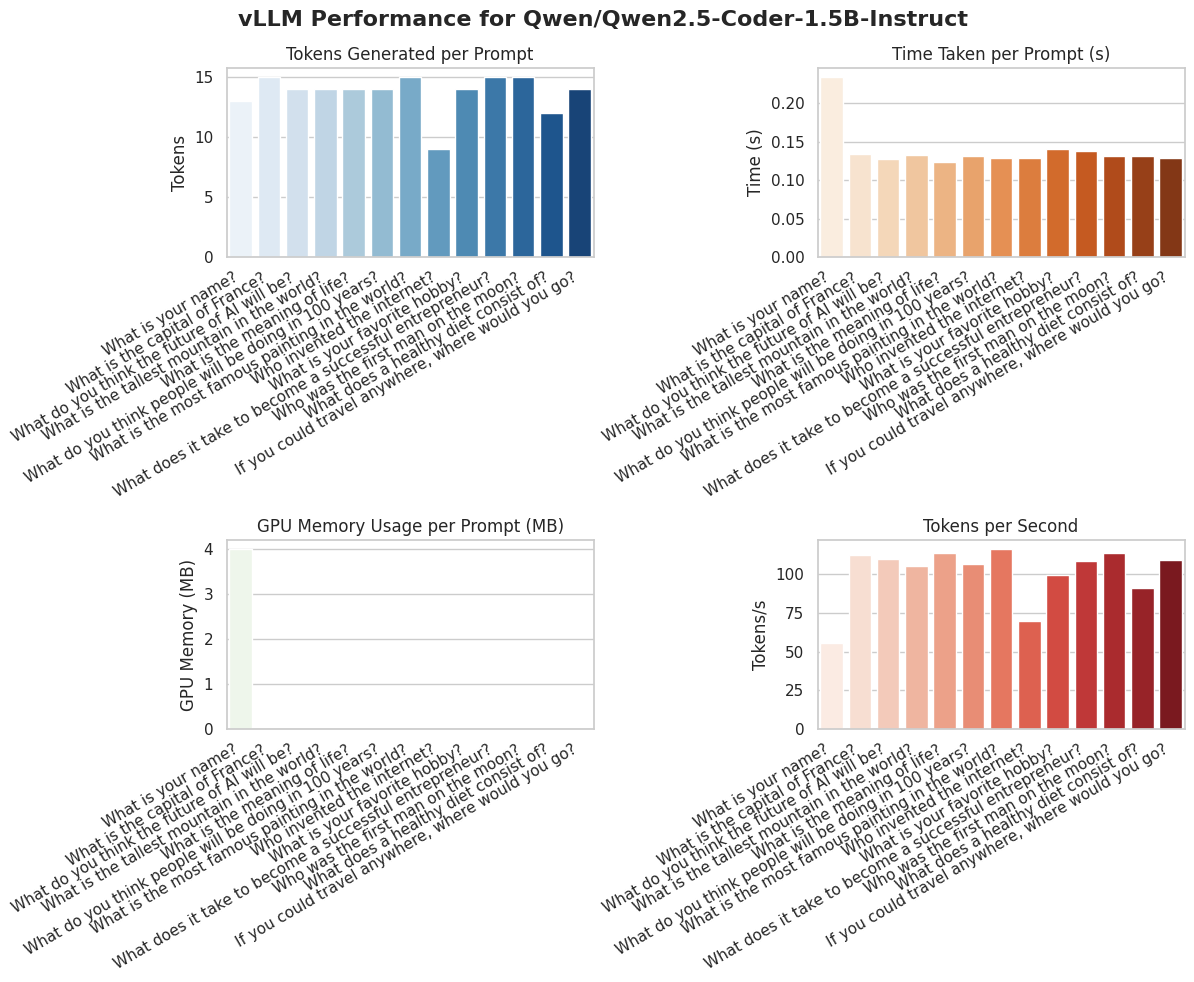

In [2]:
import time
import psutil
import tracemalloc
import pynvml
import seaborn as sns
import matplotlib.pyplot as plt

# vLLM imports
from vllm import LLM, SamplingParams

# Initialize LLM (change the model as needed)
# llm = LLM(model="NousResearch/Hermes-3-Llama-3.2-3B")
# llm = LLM(model="microsoft/phi-1_5")
model="Qwen/Qwen2.5-Coder-1.5B-Instruct"
llm = LLM(model="Qwen/Qwen2.5-Coder-1.5B-Instruct")

# Lists to store performance metrics
prompts_list = []
tokens_list = []
time_list = []
memory_list = []
gpu_memory_list = []
tokens_per_sec_list = []

def monitor_generation(prompts, sampling_params):
    """
    Measures token generation speed, time, and resource usage (CPU, memory, and GPU) 
    while generating text with vLLM. Stores data for visualization with Seaborn.
    """
    tracemalloc.start()
    pynvml.nvmlInit()
    start_time = time.time()
    total_tokens = 0
    gpu_handle = pynvml.nvmlDeviceGetHandleByIndex(0)

    print("\n=== Performance Metrics ===")
    print(f"{'Prompt':<30} {'Tokens':<10} {'Time (s)':<10} {'Memory (MB)':<10} {'GPU Mem (MB)':<12} {'Tokens/s':<10}")

    # We generate per prompt to replicate per-prompt monitoring
    for prompt in prompts:
        print(f"\nPrompt: {prompt}")
        prompt_start_time = time.time()
        
        # Take memory snapshot before generating
        snapshot_before = tracemalloc.take_snapshot()
        gpu_mem_before = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)

        # Generate text using vLLM
        output = llm.generate([prompt], SamplingParams(**sampling_params))
        # Extract the text from the first (and only) prompt
        text = output[0].outputs[0].text
        
        # Print the generated text
        print("Generated text: ", text, flush=True)
        
        # Count tokens. Here we approximate by splitting on whitespace.
        # If you want exact token count, use: 
        #   prompt_token_count = len(output[0].outputs[0].token_ids)
        prompt_token_count = len(text.split())

        # Take memory snapshot after generating
        snapshot_after = tracemalloc.take_snapshot()
        memory_diff = snapshot_after.compare_to(snapshot_before, "lineno")
        total_memory = sum(stat.size_diff for stat in memory_diff) / (1024 * 1024)

        gpu_mem_after = pynvml.nvmlDeviceGetMemoryInfo(gpu_handle).used / (1024 * 1024)
        gpu_memory_used = gpu_mem_after - gpu_mem_before
        
        prompt_end_time = time.time()
        prompt_time = prompt_end_time - prompt_start_time

        tokens_per_second = prompt_token_count / prompt_time if prompt_time > 0 else 0
        total_tokens += prompt_token_count

        # Store data for visualization
        prompts_list.append(prompt)
        tokens_list.append(prompt_token_count)
        time_list.append(prompt_time)
        memory_list.append(total_memory)
        gpu_memory_list.append(gpu_memory_used)
        tokens_per_sec_list.append(tokens_per_second)

        print(f"{'':<30} {prompt_token_count:<10} {prompt_time:<10.2f} {total_memory:<10.2f} {gpu_memory_used:<12.2f} {tokens_per_second:<10.2f}")

    end_time = time.time()
    total_time = end_time - start_time

    # CPU & Memory usage (for the entire run)
    process = psutil.Process()
    cpu_usage = process.cpu_percent(interval=0.1)
    memory_usage = process.memory_info().rss / (1024 * 1024)
    gpu_utilization = pynvml.nvmlDeviceGetUtilizationRates(gpu_handle).gpu

    # Print overall stats
    print("\n=== Overall Metrics ===")
    print(f"Total Tokens: {total_tokens}")
    print(f"Total Time: {total_time:.2f} seconds")
    print(f"Average Tokens/s: {total_tokens / total_time:.2f}")
    print(f"CPU Usage: {cpu_usage:.2f}%")
    print(f"Memory Usage: {memory_usage:.2f} MB")
    print(f"GPU Utilization: {gpu_utilization:.2f}%")

    # Shutdown NVML
    pynvml.nvmlShutdown()

def visualize_results():
    """
    Uses Seaborn to visualize performance metrics.
    """
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f"vLLM Performance for {model}", fontsize=16, fontweight='bold')

    # Tokens per prompt
    sns.barplot(x=prompts_list, y=tokens_list, ax=axes[0, 0], palette="Blues")
    axes[0, 0].set_title("Tokens Generated per Prompt")
    axes[0, 0].set_ylabel("Tokens")
    axes[0, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Time per prompt
    sns.barplot(x=prompts_list, y=time_list, ax=axes[0, 1], palette="Oranges")
    axes[0, 1].set_title("Time Taken per Prompt (s)")
    axes[0, 1].set_ylabel("Time (s)")
    axes[0, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    # GPU memory usage
    sns.barplot(x=prompts_list, y=gpu_memory_list, ax=axes[1, 0], palette="Greens")
    axes[1, 0].set_title("GPU Memory Usage per Prompt (MB)")
    axes[1, 0].set_ylabel("GPU Memory (MB)")
    axes[1, 0].set_xticklabels(prompts_list, rotation=30, ha="right")

    # Tokens per second
    sns.barplot(x=prompts_list, y=tokens_per_sec_list, ax=axes[1, 1], palette="Reds")
    axes[1, 1].set_title("Tokens per Second")
    axes[1, 1].set_ylabel("Tokens/s")
    axes[1, 1].set_xticklabels(prompts_list, rotation=30, ha="right")

    plt.tight_layout()
    plt.show()

# Define prompts and sampling parameters
prompts = [
    "What is your name?",
    "What is the capital of France?",
    "What do you think the future of AI will be?",
    "What is the tallest mountain in the world?",
    "What is the meaning of life?",
    "What do you think people will be doing in 100 years?",
    "What is the most famous painting in the world?",
    "Who invented the internet?",
    "What is your favorite hobby?",
    "What does it take to become a successful entrepreneur?",
    "Who was the first man on the moon?",
    "What does a healthy diet consist of?",
    "If you could travel anywhere, where would you go?"
]

sampling_params = {"temperature": 0.8, "top_p": 0.95}

# Run the monitoring function
monitor_generation(prompts, sampling_params)

# Visualize results
visualize_results()
